In [2]:
import re
import pandas as pd
import numpy as np

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
from bertopic.representation import MaximalMarginalRelevance

import pathlib

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

import plotly


C:\Users\Re\Documents\GitHub\abstlyze\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Re\Documents\GitHub\abstlyze\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Re\Documents\GitHub\abstlyze\venv\lib\site-packages\umap\distances.

In [14]:
# strategy  probabilities distributions c-tf-idf embeddings
strategy = "embeddings"
# threshold // c_v // outlier
probabilities = np.loadtxt('cv_probabilities.txt')
distributions = np.loadtxt('cv_distributions.txt')
c_tf_idf = np.loadtxt('cv_c-tf-idf.txt')
embeddings = np.loadtxt('cv_embeddings.txt')

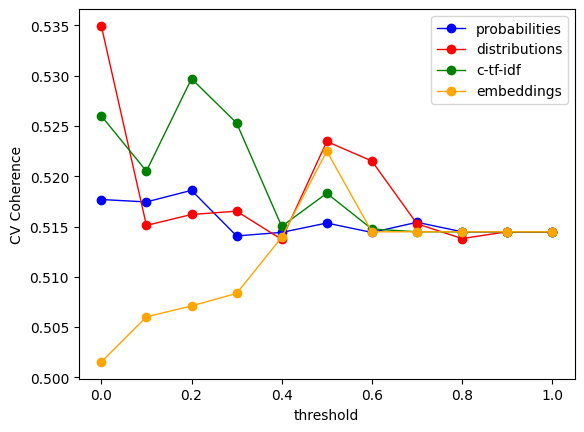

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(probabilities[:, 0], probabilities[:, 1], "-", c="Blue", linewidth=1, marker='o', alpha=1)
ax.plot(distributions[:, 0], distributions[:, 1], "-", c="Red", linewidth=1, marker='o', alpha=1)
ax.plot(c_tf_idf[:, 0], c_tf_idf[:, 1], "-", c="Green", linewidth=1, marker='o', alpha=1)
ax.plot(embeddings[:, 0], embeddings[:, 1], "-", c="Orange", linewidth=1, marker='o', alpha=1)

ax.set_xlabel('threshold')
ax.set_ylabel('CV Coherence')

ax.legend(['probabilities', 'distributions', 'c-tf-idf', 'embeddings'])

fig.savefig('cv.png', dpi=300)

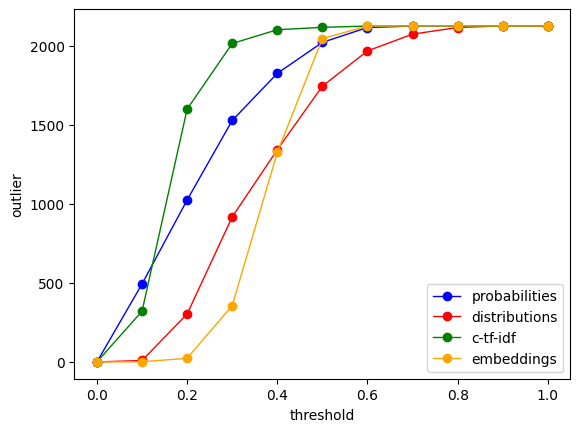

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(probabilities[:, 0], probabilities[:, 2], "-", c="Blue", linewidth=1, marker='o', alpha=1)
ax.plot(distributions[:, 0], distributions[:, 2], "-", c="Red", linewidth=1, marker='o', alpha=1)
ax.plot(c_tf_idf[:, 0], c_tf_idf[:, 2], "-", c="Green", linewidth=1, marker='o', alpha=1)
ax.plot(embeddings[:, 0], embeddings[:, 2], "-", c="Orange", linewidth=1, marker='o', alpha=1)

ax.set_xlabel('threshold')
ax.set_ylabel('outlier')

ax.legend(['probabilities', 'distributions', 'c-tf-idf', 'embeddings'])

fig.savefig('outlier.png', dpi=300)

In [40]:
import pandas as pd


def remove_chars_until_last_whitespace(input_str):
    # 文字列を逆順にし、最初の空白の位置を検索
    last_whitespace_index = input_str[::-1].find(' ')

    # 最初の空白が見つかった場合、その位置までの文字列を削除
    if last_whitespace_index != -1:
        input_str = input_str[:-last_whitespace_index - 1]

    return remove_spaces_until_first_char(input_str)


def remove_spaces_until_first_char(input_str):
    # 文字列の最初の文字が現れる位置を検索
    first_char_index = next((i for i, c in enumerate(input_str) if not c.isspace()), len(input_str))

    # 最初の文字が見つかった場合、その位置までの空白を削除
    input_str = input_str[first_char_index:]

    return input_str


def get_first_10_words(input_str):
    words = input_str.split()  # 空白文字で文字列を単語に分割
    first_10_words = ' '.join(words[:20])  # 最初の10単語までを取得
    return first_10_words


# CSVファイルのパス
csv_file_path = 'reduced_topic.csv'

# CSVファイルを読み込む
df = pd.read_csv(csv_file_path)

# CSVファイル、検索対象の列（0-indexed）、検索文字列を指定
csv_file = "dataset\\fsas\\fsas_full_utf8_dated.csv"
column_index = 2  # 3列目を検索対象にする場合（0-indexedなので2を指定）
search_string = "this paper is concerned with the problem of adaptive fuzzy memory control"
# CSVファイルを読み込む
df_ = pd.read_csv(csv_file)

# 検索対象の列を取得
target_column = df_.iloc[:, column_index]

# 各行の要素を順に表示
for index, row in df.iterrows():
    # print(f"Row {index + 1}:")
    for i, value in enumerate(row):
        # print(f"  {i + 1}: {value}")
        if i == 0:
            print("Cluster: ", value)
        elif i == 5:
            print("Abst: ", value)
            search_string = remove_chars_until_last_whitespace(value[1:-3])
            # 検索結果が見つかった行の行番号を格納するリスト
            search_results = []

            # 各行で検索を行い、結果をリストに格納
            for index, row in enumerate(target_column):
                # print(row)
                # if index == 100:
                #     break
                # if search_string.lower() in str(row).lower():
                #     search_results.append(index + 1)
                row_words = str(row).lower().split()
                search_words = search_string.lower().split()

                if all(search_word in ' '.join(row_words) for search_word in search_words):
                    search_results.append(index + 2)
                # if str(row).startswith(search_string):
                #     search_results.append(index + 1)

            # 検索結果が見つかった行の行番号を表示
            if search_results:
                print("FIND :")
                for index, result in enumerate(search_results):
                    print(result)
                    print("Title : " + df_.iloc[result - 2, 0])
                    print("Author : " + df_.iloc[result - 2, 1])
            else:
                print("指定された文字列は見つかりませんでした。")
    print("")


Cluster:  1
Abst:  [this paper is concerned with the problem of adaptive fuzzy memory control for a class of uncertain nonlinear systems with unknown time delays compared with the existing results the restrictions o...
FIND :
1295
Title : Delay-estimation-based adaptive fuzzy memory control for a class of uncertain nonlinear time-delay systems
Author : Ding Zhai, Changjiang Xi, Jiuxiang Dong, Qingling Zhang

Cluster:  2
Abst:  [two major approaches to deal with randomness or ambiguity involved in mathematical programming problems have been developed they are stochastic programming approaches and fuzzy programming approa...
FIND :
3919
Title : An interactive fuzzy satisficing method for multiobjective linear programming problems with random variable coefficients through a probability maximization model
Author : Masatoshi Sakawa, Kosuke Kato, Hideki Katagiri

Cluster:  3
Abst:  [clustering is one of the most popular data mining methods for analyzing the time series not only due to its ex

In [9]:
import pandas as pd

# CSVファイル、検索対象の列（0-indexed）、検索文字列を指定
csv_file = "dataset\\fsas\\fsas_full_utf8_dated.csv"
column_index = 2  # 3列目を検索対象にする場合（0-indexedなので2を指定）
search_string = "this paper is concerned with the problem of adaptive fuzzy memory control"
# CSVファイルを読み込む
df_ = pd.read_csv(csv_file)

# 検索対象の列を取得
target_column = df_.iloc[:, column_index]

# 検索結果が見つかった行の行番号を格納するリスト
search_results = []

# 各行で検索を行い、結果をリストに格納
for index, row in enumerate(target_column):
    # print(row)
    # if index == 100:
    #     break
    if search_string.lower() in str(row).lower():
        search_results.append(index + 1)
    # if str(row).startswith(search_string):
    #     search_results.append(index + 1)

# 検索結果が見つかった行の行番号を表示
if search_results:
    print("指定された文字列が見つかった行の行番号:")
    for result in search_results:
        print(result)
else:
    print("指定された文字列は見つかりませんでした。")

指定された文字列が見つかった行の行番号:
1294
